# Overall Trend of Covid-19 
<br>

**The main purpose is to present how the trend of Covid-19 is changing from 2021-01-01 to 2021-12-19.** 
<br><br>
Let me be clear that the factors I used in this project are not the only features to be considered. A lot more factors would have been influencial up until this point and will play a certain role in the future.  However, I reckoned these are the main features people would be concerned of and hence, decided to exclude the factors besides the three parts I have used.

This project is about displaying the number of new cases and mortalities(also death rate) based on the number of vaccinations throughout this year. Also, I have come to know that some people doubt the effect of the vaccine. Hence, I thought it would be a good idea to see the effectiveness of the vaccine.


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

**First, load the data.**
(source : [*Our world in Data*](https://ourworldindata.org/coronavirus))

In [2]:
covid_df = pd.read_csv('covid_data.csv')

In [3]:
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,KOR,Asia,South Korea,2021-01-01,62593,824,955.857,942,25,21.286,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
1,KOR,Asia,South Korea,2021-01-02,63244,651,910.286,962,20,22.000,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
2,KOR,Asia,South Korea,2021-01-03,64264,1020,940.571,981,19,23.143,...,6.2,40.9,NaN,12.27,83.03,0.916,171.8,0.06,-1.55,3.348589
3,KOR,Asia,South Korea,2021-01-04,64979,715,893.429,1007,26,21.143,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
4,KOR,Asia,South Korea,2021-01-05,65818,839,863.571,1027,20,21.143,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,KOR,Asia,South Korea,2021-12-14,536495,7843,6715.857,4456,69,62.286,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
348,KOR,Asia,South Korea,2021-12-15,544117,7622,6790.429,4518,62,63.000,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
349,KOR,Asia,South Korea,2021-12-16,551551,7434,6849.286,4591,73,65.857,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
350,KOR,Asia,South Korea,2021-12-17,558864,7313,6897.286,4644,53,62.000,...,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN


In [4]:
covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

**Extract neccesary columns from the dataframe.**

In [5]:
extracted_covid_df = covid_df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'people_vaccinated', 'people_fully_vaccinated', 
                               'total_vaccinations', 'new_vaccinations']]
extracted_covid_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,total_vaccinations,new_vaccinations
0,South Korea,2021-01-01,62593,824,942,25,NaN,NaN,NaN,NaN
1,South Korea,2021-01-02,63244,651,962,20,NaN,NaN,NaN,NaN
2,South Korea,2021-01-03,64264,1020,981,19,NaN,NaN,NaN,NaN
3,South Korea,2021-01-04,64979,715,1007,26,NaN,NaN,NaN,NaN
4,South Korea,2021-01-05,65818,839,1027,20,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
347,South Korea,2021-12-14,536495,7843,4456,69,43116376.0,41820253.0,91393159.0,906800.0
348,South Korea,2021-12-15,544117,7622,4518,62,43204838.0,41878501.0,92470992.0,1077833.0
349,South Korea,2021-12-16,551551,7434,4591,73,43300593.0,41939065.0,93515220.0,1044228.0
350,South Korea,2021-12-17,558864,7313,4644,53,NaN,NaN,NaN,NaN


In [6]:
df_copy = extracted_covid_df.copy()
# make a duplicate for the data

In [7]:
df_copy['new_cases']

0       824
1       651
2      1020
3       715
4       839
       ... 
347    7843
348    7622
349    7434
350    7313
351    6234
Name: new_cases, Length: 352, dtype: int64

In [8]:
df_copy[['date', 'location', 'new_cases', 'new_vaccinations']]

,date,location,new_cases,new_vaccinations
0,2021-01-01,South Korea,824,NaN
1,2021-01-02,South Korea,651,NaN
2,2021-01-03,South Korea,1020,NaN
3,2021-01-04,South Korea,715,NaN
4,2021-01-05,South Korea,839,NaN
...,...,...,...,...
347,2021-12-14,South Korea,7843,906800.0
348,2021-12-15,South Korea,7622,1077833.0
349,2021-12-16,South Korea,7434,1044228.0
350,2021-12-17,South Korea,7313,NaN


In [9]:
df_copy.date

0      2021-01-01
1      2021-01-02
2      2021-01-03
3      2021-01-04
4      2021-01-05
          ...    
347    2021-12-14
348    2021-12-15
349    2021-12-16
350    2021-12-17
351    2021-12-18
Name: date, Length: 352, dtype: object

In [10]:
df_copy['year'] = pd.DatetimeIndex(df_copy.date).year
df_copy['month'] = pd.DatetimeIndex(df_copy.date).month
df_copy['day'] = pd.DatetimeIndex(df_copy.date).day
# add more columns to the data frame

In [11]:
df_copy

,location,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,people_fully_vaccinated,total_vaccinations,new_vaccinations,year,month,day
0,South Korea,2021-01-01,62593,824,942,25,NaN,NaN,NaN,NaN,2021,1,1
1,South Korea,2021-01-02,63244,651,962,20,NaN,NaN,NaN,NaN,2021,1,2
2,South Korea,2021-01-03,64264,1020,981,19,NaN,NaN,NaN,NaN,2021,1,3
3,South Korea,2021-01-04,64979,715,1007,26,NaN,NaN,NaN,NaN,2021,1,4
4,South Korea,2021-01-05,65818,839,1027,20,NaN,NaN,NaN,NaN,2021,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,South Korea,2021-12-14,536495,7843,4456,69,43116376.0,41820253.0,91393159.0,906800.0,2021,12,14
348,South Korea,2021-12-15,544117,7622,4518,62,43204838.0,41878501.0,92470992.0,1077833.0,2021,12,15
349,South Korea,2021-12-16,551551,7434,4591,73,43300593.0,41939065.0,93515220.0,1044228.0,2021,12,16
350,South Korea,2021-12-17,558864,7313,4644,53,NaN,NaN,NaN,NaN,2021,12,17


In [12]:
cases_per_month = []
for i in range(1, 13):
    sum = df_copy[df_copy.month == i]['new_cases'].sum()
    cases_per_month.append(sum)
cases_per_month = np.array(cases_per_month)
cases_per_month

array([ 16739,  11523,  13608,  18995,  18165,  16924,  42064,  53658,
        60328,  52613,  85964, 112748], dtype=int64)

**Draw two plots to visualize the overall trend of the pandemic.
<br><br>
The first one is fitted in line, and the other in polynomial curve.**

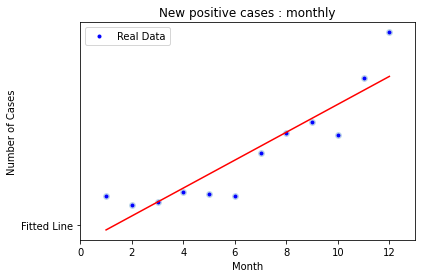

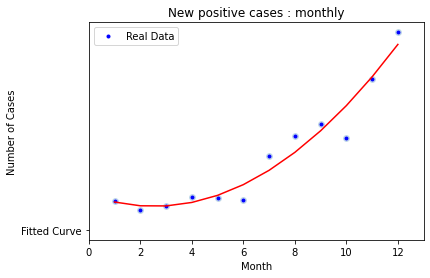

In [13]:
x = np.array([i for i in range(1, 13)])
cases_per_hundred = cases_per_month / 100
y = cases_per_hundred

m, n = np.polyfit(x, y, 1)  
#m = slope, n = intercept
plt.title('New positive cases : monthly')
plt.plot(x, y, 'b.', label = 'Real Data')
plt.plot(x, m * x + n, 'r-', 'Fitted Line')
plt.scatter(x, y, alpha = 0.2)
plt.xlim([0, 13])
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

a, b, c = np.polyfit(x, y, 2)

plt.title('New positive cases : monthly')
plt.plot(x, y, 'b.', label = 'Real Data')
plt.plot(x, a * x ** 2 + b * x  + c, 'r-', 'Fitted Curve')
plt.scatter(x, y, alpha = 0.2)
plt.xlim([0, 13])
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

In [14]:
df_copy[['month', 'people_fully_vaccinated']]

,month,people_fully_vaccinated
0,1,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,1,NaN
...,...,...
347,12,41820253.0
348,12,41878501.0
349,12,41939065.0
350,12,NaN


In [15]:
df_copy[df_copy.month >= 2][['date','people_fully_vaccinated', 'new_cases', 'new_deaths']]

,date,people_fully_vaccinated,new_cases,new_deaths
31,2021-02-01,NaN,336,10
32,2021-02-02,NaN,467,6
33,2021-02-03,NaN,451,7
34,2021-02-04,NaN,369,11
35,2021-02-05,NaN,393,5
...,...,...,...,...
347,2021-12-14,41820253.0,7843,69
348,2021-12-15,41878501.0,7622,62
349,2021-12-16,41939065.0,7434,73
350,2021-12-17,NaN,7313,53


In [16]:
df_copy['weekday'] = pd.DatetimeIndex(df_copy.date).weekday
df_copy['week'] = pd.DatetimeIndex(df_copy.date).week

<ipython-input-16-0a1540db5860>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_copy['week'] = pd.DatetimeIndex(df_copy.date).week


In [17]:
grouped_df = df_copy.groupby('week')['new_cases', 'new_deaths'].sum()
vaccinations = df_copy[df_copy.weekday == 6]['people_fully_vaccinated']

# group the data by 'week' to facilitate the use of data

<ipython-input-17-bf68bed90edf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = df_copy.groupby('week')['new_cases', 'new_deaths'].sum()


In [18]:
grouped_df

,new_cases,new_deaths
week,,
1,4850,159
2,3615,124
3,2792,96
4,2987,65
5,2677,49
6,2684,53
7,3455,35
8,2707,43
9,2786,37


In [19]:
np.array(vaccinations[8:]).shape

(42,)

<AxesSubplot:xlabel='week'>

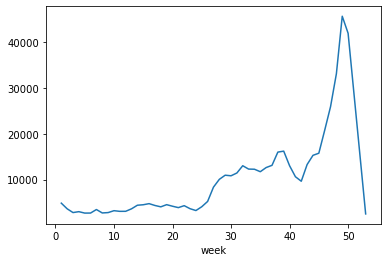

In [20]:
grouped_df.new_cases.plot()

<AxesSubplot:xlabel='week'>

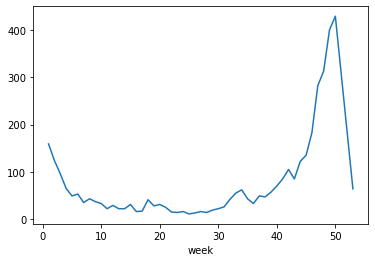

In [21]:
grouped_df.new_deaths.plot()

<AxesSubplot:title={'center':'Death rate'}, xlabel='week'>

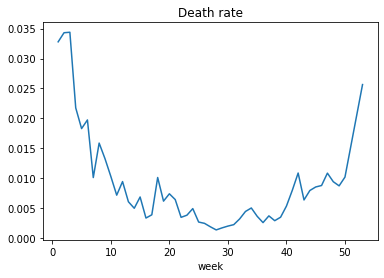

In [22]:
death_rate = grouped_df.new_deaths / grouped_df.new_cases 
death_rate.plot(title = 'Death rate')

In [23]:
deaths_per_week = np.array(grouped_df.new_deaths)
cases_per_week = np.array(grouped_df.new_cases)
accumulated_vaccinations = np.array(vaccinations)

In [24]:
deathrate_per_week = (deaths_per_week / cases_per_week) * 100

In [39]:
x = accumulated_vaccinations[8 : 50]
y = deathrate_per_week[8:50]
# exclude the first 7 data since the value is nan

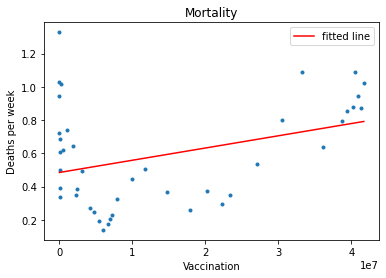

In [40]:
line_model = np.poly1d(np.polyfit(x, y, 1))
line = np.linspace(x[0], x[-1], 42)

plt.title('Mortality')
plt.plot(line, line_model(line), 'r-', label = 'fitted line')
plt.scatter(x, y, marker = '.')
plt.xlabel('Vaccination')
plt.ylabel('Deaths per week')
plt.legend()
plt.show()


In [41]:
r2_score(y, line_model(x))

0.1342214869875351

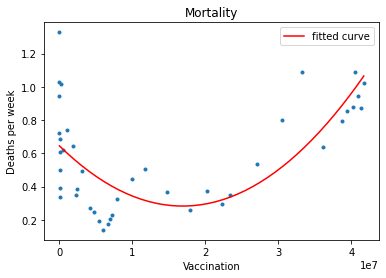

In [42]:
curve_model = np.poly1d(np.polyfit(x, y, 2))
line = np.linspace(x[0], x[-1], 42)

plt.title('Mortality')
plt.plot(line, curve_model(line), 'r-', label = 'fitted curve')
plt.scatter(x, y, marker = '.')
plt.xlabel('Vaccination')
plt.ylabel('Deaths per week')
plt.legend()
plt.show()

In [43]:
r2_score(y, curve_model(x))

0.501835370313855

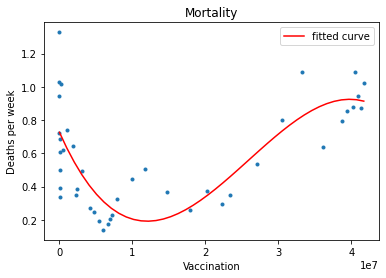

In [44]:
model = np.poly1d(np.polyfit(x, y, 3))
line = np.linspace(x[0], x[-1], 42)

plt.title('Mortality')
plt.plot(line, model(line), 'r-', label = 'fitted curve')
plt.scatter(x, y, marker = '.')
plt.xlabel('Vaccination')
plt.ylabel('Deaths per week')
plt.legend()
plt.show()

In [45]:
r2_score(y, model(x))

0.6166412519020321

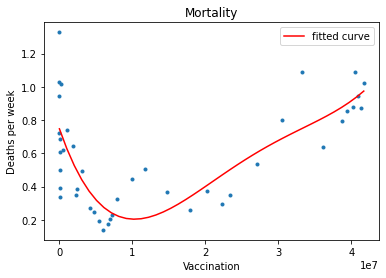

In [32]:
model = np.poly1d(np.polyfit(x, y, 4))
line = np.linspace(x[0], x[-1], 42)

plt.title('Mortality')
plt.plot(line, model(line), 'r-', label = 'fitted curve')
plt.scatter(x, y, marker = '.')
plt.xlabel('Vaccination')
plt.ylabel('Deaths per week')
plt.legend()
plt.show()

In [47]:
r2_score(y, model(x))
# no big difference from the model above

0.6166412519020321

## Correlation of vaccination and death rate

**It seems the number of vaccination has little effect in preventing the death rate caused by. However, the new 'smoothed social distancing' was held since October and 'With-Corona' policy began at November.**

**Let's exclude the data from after October and figure out whether the vaccination has little effect. The model which degree = 3 seems adequate for the polynomial fit.**


In [48]:
df_copy[df_copy.month >= 10]['week']

273    39
274    39
275    39
276    40
277    40
       ..
347    50
348    50
349    50
350    50
351    50
Name: week, Length: 79, dtype: int64

In [49]:
x = accumulated_vaccinations[8 : 39]
y = deathrate_per_week[8 : 39]
#exclude the data from after October

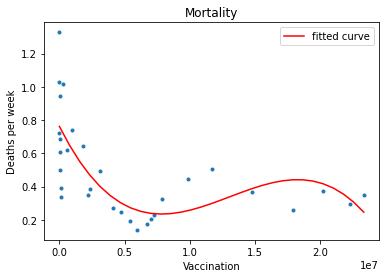

In [50]:
model = np.poly1d(np.polyfit(x, y, 3))
line = np.linspace(x[0], x[-1], 31)

plt.title('Mortality')
plt.plot(line, model(line), 'r-', label = 'fitted curve')
plt.scatter(x, y, marker = '.')
plt.xlabel('Vaccination')
plt.ylabel('Deaths per week')
plt.legend()
plt.show()

In [51]:
r2_score(y, model(x))

0.546189670017958

### It is clear there was a significant decrease in death rate before October.
> Although the curve fluctuates a bit, it is remarkable that the number of vaccination is effective in preventing serious damage from the virus.
> 
> The correlation is approximately 0.55 which implies that vaccination is not the sole factor which determines the death rate.

**Let's see how the vaccination effects the number of cases.**

In [52]:
y = cases_per_week[8 : 39]

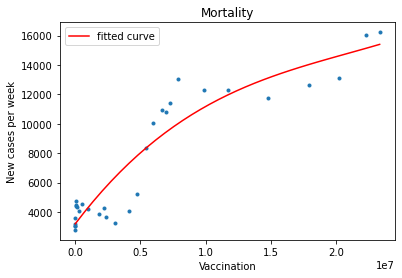

In [53]:
model = np.poly1d(np.polyfit(x, y, 3))
line = np.linspace(x[0], x[-1], 35)

plt.title('Mortality')
plt.plot(line, model(line), 'r-', label = 'fitted curve')
plt.scatter(x, y, marker = '.')
plt.xlabel('Vaccination')
plt.ylabel('New cases per week')
plt.legend()
plt.show()

**The number of cases though, does not seem to decrease. The reason is, as I mentioned in the first place, the number of vaccination may be important factor but not enough to explain the trend of this whole pandemic.**

## Conclusion

> The number of vaccination does show effect to curing your body from covid-19. 
> 
> The substantial effect of the vaccine notwithstanding, there are a lot more factors and complicated reasons that determine the situation(e.g. policy).